In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('weight-height.csv')

In [22]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [24]:
df.shape

(10000, 3)

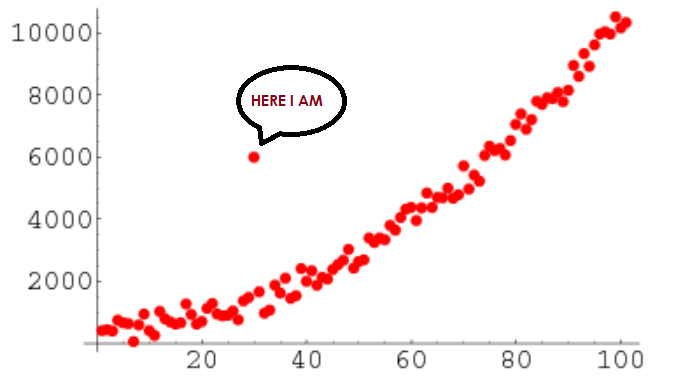

In [25]:
from PIL import Image
img= Image.open('out.png')
img

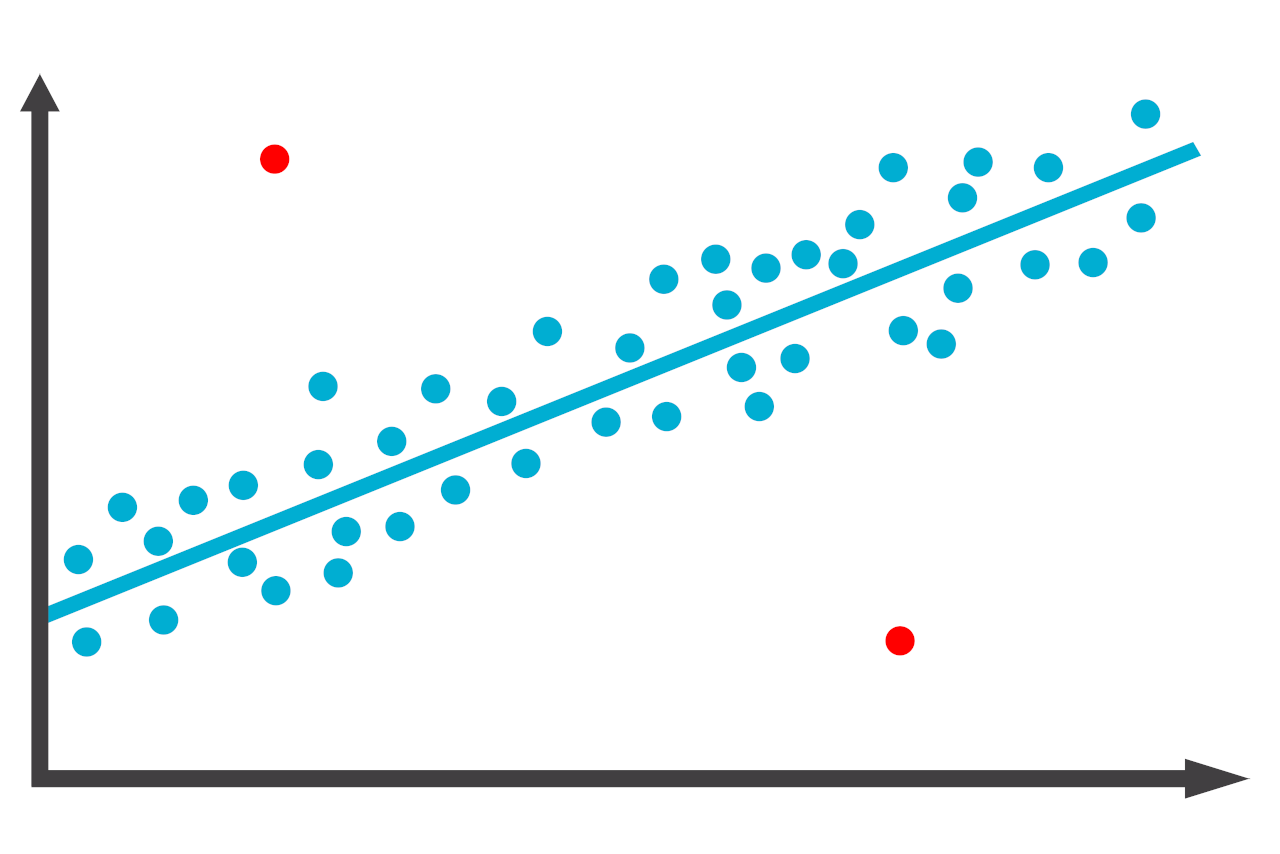

In [26]:
img = Image.open('outliers.png')
img

<AxesSubplot:xlabel='Weight', ylabel='Count'>

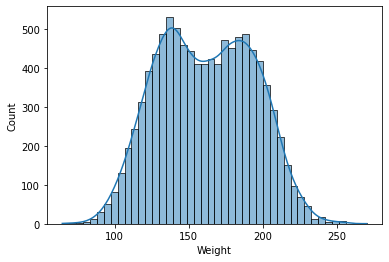

In [27]:
sns.histplot(df['Weight'], kde=True) #when kde is true then dataset shows distributed


In [28]:
mean_value = df['Weight'].mean()
mean_value

161.44035683283076

In [29]:
standarddeviation = df['Weight'].std()  #standard deviation
standarddeviation

32.108439006519596

In [30]:
# we calculate the 3 stardard deviation when you will see and won't understand then you can go your copy where you did wrote about this topics

std_3 = mean_value+(3*standarddeviation) # increasing x=3 is positive
std_3

257.76567385238957

In [31]:
neg_std_3 =mean_value-(3*standarddeviation) # decreasing x=-3 is negative
neg_std_3

65.11503981327198

In [32]:
# now i'm checking which data point out of the range that means outlier

df[df['Weight']>std_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [33]:
df[df['Weight']<neg_std_3]

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [54]:
marge_outlier = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]

In [55]:
marge_outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [56]:
remove_outlier = df[(df['Weight']<std_3) & (df['Weight']>neg_std_3)] 

In [57]:
remove_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [62]:
remove_outlier.shape

(9998, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

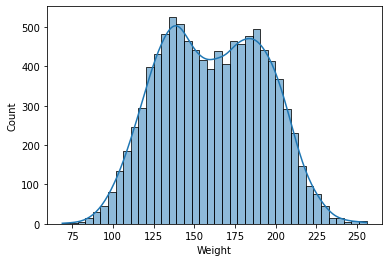

In [63]:
sns.histplot(remove_outlier['Weight'] ,kde=True)

In [67]:
dummy_variable = pd.get_dummies(remove_outlier['Gender'],drop_first=True)

In [68]:
dummy_variable

,Male
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [70]:
new_df = remove_outlier.drop('Gender',axis=1)

In [71]:
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [75]:
df = pd.concat([new_df,dummy_variable],axis=1)

In [76]:
df

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [78]:
# independent variables are Weight and Male , One the other hand dependent variable is Height

x = df.drop(['Height'],axis=1)

In [83]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [80]:
y = df['Height']

In [82]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [85]:
# #split dataset into train and test

from sklearn.model_selection import train_test_split

In [86]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=10)

In [87]:
xtrain.shape

(6998, 2)

In [88]:
xtest.shape

(3000, 2)

In [89]:
# using LinearRegression

from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()

In [91]:
model.fit(xtrain,ytrain)

LinearRegression()

In [92]:
model.coef_

array([ 0.1235128 , -0.96787853])

In [94]:
model.intercept_

46.91772005222235

In [98]:
pred=model.predict(xtest)
pred

array([71.44611359, 65.31647299, 62.51455123, ..., 62.8174847 ,
       63.67019014, 67.39299027])

In [99]:
model.score(xtest,ytest)

0.8555535555843828

In [97]:
#formal way to find score

from sklearn.metrics import mean_squared_error, r2_score

In [101]:
mean_squared_error(ytest,pred)

2.0830037685433167

In [102]:
r2_score(ytest,pred)

0.8555535555843828